In [1]:
# Importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from packaged_folder.Functions import (Basic_info_func, Remove_outliers_with_lof, Select_k_best_features, Adjusted_r2_score,
                       Evaluation_results)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy import stats
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import xgboost as xgb
from sklearn.neighbors import LocalOutlierFactor
from sklearn.feature_selection import mutual_info_regression, SelectKBest, f_regression
from sklearn.model_selection import train_test_split

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
%load_ext autoreload
%autoreload 2


Path = /OneDrive/Desktop/MS-AAi/Course_500_Probability/Project_AAI500-A1 

In [2]:
#loading dataset 
train_df = pd.read_csv('./Data/train_df.csv')
test_df = pd.read_csv('./Data/test_df.csv')

X_train = train_df.drop('critical_temp', axis = 1)
y_train = train_df['critical_temp']

X_test = test_df.drop('critical_temp', axis = 1)
y_test = test_df['critical_temp']

In [3]:
new_train_X, new_train_y  = Remove_outliers_with_lof(X_train, y_train, contamination = 0.005)

Shape before outlier removal:
(19136, 82)

Shape after outlier removal:
(19040, 82)


### Features Selection

In the data analysis part we observed that our entire data has many highly colinear features that causes multi colinearity. 


In [6]:
# Selecting features using cusstom function and mutual_info_regression
X_train_filtered, scores = Select_k_best_features(new_train_X, new_train_y, k=30, score_func=mutual_info_regression)

print(scores)
selected_columns = X_train_filtered.columns

X_test_filtered = X_test[selected_columns]

scaler = StandardScaler()
scaled_train_k_best = scaler.fit_transform(X_train_filtered)
scaled_test_k_best = scaler.transform(X_test_filtered)



std_fie                        0.936162
gmean_Density                  0.929497
std_ThermalConductivity        0.919061
entropy_atomic_mass            0.917424
entropy_atomic_radius          0.909855
range_fie                      0.900306
range_ElectronAffinity         0.895783
entropy_Density                0.890029
entropy_FusionHeat             0.883159
entropy_ElectronAffinity       0.880617
std_ElectronAffinity           0.874442
range_Density                  0.868894
wtd_gmean_Valence              0.866866
gmean_FusionHeat               0.865918
mean_ThermalConductivity       0.864272
wtd_mean_Valence               0.861474
std_atomic_radius              0.847472
gmean_ElectronAffinity         0.837540
gmean_ThermalConductivity      0.831210
wtd_gmean_Density              0.826616
range_atomic_mass              0.823123
entropy_Valence                0.821986
entropy_fie                    0.819133
mean_FusionHeat                0.817270
mean_ElectronAffinity          0.811273


### Multiple Linear Regression

Linear Regression Results

 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Training results:
Training RMSE: 20.00363
Training MAE: 15.25545
Training R2 score: 0.65934
Training Adjusted R2 score: 0.65879

 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

Testing results:
Testing RMSE: 20.01363
Testing MAE: 15.24122
Testing R2 score: 0.64744
Testing Adjusted R2 score: 0.64222


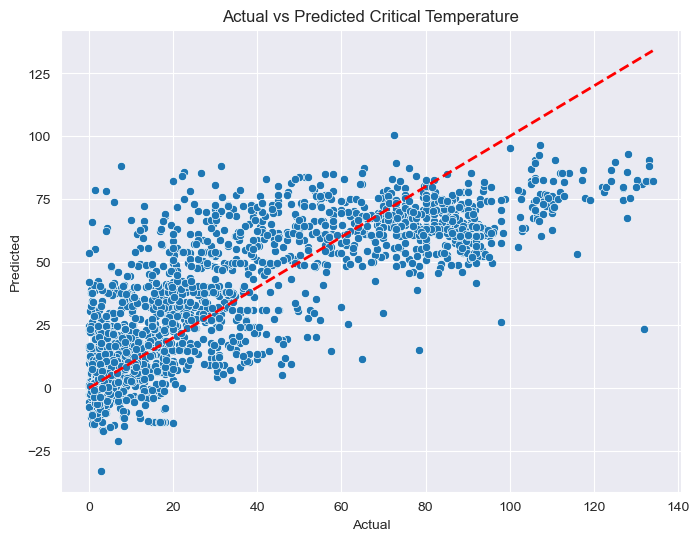

In [26]:
# Step 1: Initialize the linear regression model
simple_linear_regression = LinearRegression()

# Step 2: Fit the model on the scaled training data
simple_linear_regression.fit(scaled_train_k_best, new_train_y)

# Step 3: Predict on the training set
train_preds = simple_linear_regression.predict(scaled_train_k_best)

# Testing results
print('Linear Regression Results')
num_features = scaled_train_k_best.shape[1]
train_metrics = Evaluation_results(new_train_y, train_preds, objective = 'train', num_features  = num_features)
train_metrics

# # Testing Results
test_preds = simple_linear_regression.predict(scaled_test_k_best)
test_metrics = Evaluation_results(y_test, test_preds, objective = 'test', num_features  = num_features)
test_metrics

# Plotting the results
plt.figure(figsize=(8, 6))
sns.scatterplot(x= y_test, y = test_preds)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Critical Temperature')
plt.show()

### Random Forest

Random Forest Results

 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Training results:
Training RMSE: 14.08610
Training MAE: 9.60928
Training R2 score: 0.83108
Training Adjusted R2 score: 0.83081

Random Forest Results on Test Set

 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

Testing results:
Testing RMSE: 14.31881
Testing MAE: 9.74937
Testing R2 score: 0.81953
Testing Adjusted R2 score: 0.81695



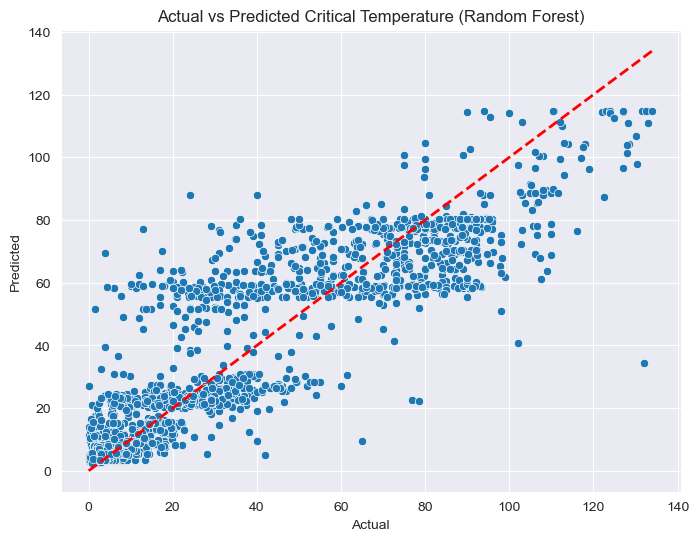

In [6]:
# Step 1: Define the Random Forest model
rf_model = RandomForestRegressor(n_estimators=500, 
                                 max_depth=6,
                                 random_state=42)

# Step 2: Fit the model on the scaled training data
rf_model.fit(scaled_train_k_best, new_train_y)

# Step 3: Predict on the training set
rf_train_preds = rf_model.predict(scaled_train_k_best)

# Training results
print('Random Forest Results')
num_features = scaled_train_k_best.shape[1]
train_metrics = Evaluation_results(new_train_y, rf_train_preds, objective='train', num_features=num_features)
print(train_metrics)

# Step 4: Predict on the testing set
rf_test_preds = rf_model.predict(scaled_test_k_best)

# Testing results
print('Random Forest Results on Test Set')
test_metrics = Evaluation_results(y_test, rf_test_preds, objective='test', num_features=num_features)
print(test_metrics)

# Plotting the results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=rf_test_preds)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Critical Temperature (Random Forest)')
plt.show()


### Gradient Boosting

Gradient Boosting Machine Results

 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Training results:
Training RMSE: 4.20497
Training MAE: 1.34876
Training R2 score: 0.98495
Training Adjusted R2 score: 0.98492

Gradient Boosting Machine Results on Test Set

 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

Testing results:
Testing RMSE: 10.99432
Testing MAE: 5.77260
Testing R2 score: 0.89361
Testing Adjusted R2 score: 0.89208



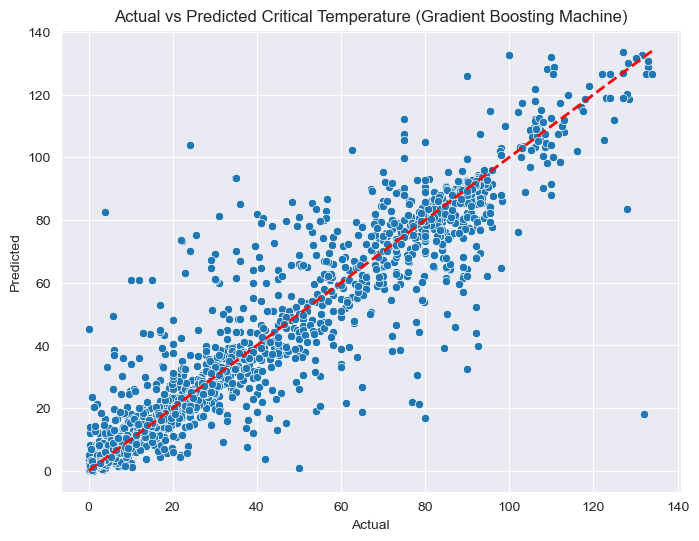

In [7]:
# Step 1: Initialize the GBM Regressor model
gbm_model = GradientBoostingRegressor(n_estimators=1000,
                                      learning_rate=0.015,
                                      max_depth=20,
                                      random_state=42)

# Step 2: Fit the model on the scaled training data
gbm_model.fit(scaled_train_k_best, new_train_y)

# Step 3: Predict on the training set
gbm_train_preds = gbm_model.predict(scaled_train_k_best)

# Training results
print('Gradient Boosting Machine Results')
num_features = scaled_train_k_best.shape[1]
train_metrics = Evaluation_results(new_train_y, gbm_train_preds, objective='train', num_features=num_features)
print(train_metrics)

# Step 4: Predict on the testing set
gbm_test_preds = gbm_model.predict(scaled_test_k_best)

# Testing results
print('Gradient Boosting Machine Results on Test Set')
test_metrics = Evaluation_results(y_test, gbm_test_preds, objective='test', num_features=num_features)
print(test_metrics)

# Plotting the results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=gbm_test_preds)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Critical Temperature (Gradient Boosting Machine)')
plt.show()


### XGBoost

XGBoost Results

 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Training results:
Training RMSE: 4.56446
Training MAE: 2.00625
Training R2 score: 0.98226
Training Adjusted R2 score: 0.98224

 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

Testing results:
Testing RMSE: 9.73908
Testing MAE: 5.28228
Testing R2 score: 0.91651
Testing Adjusted R2 score: 0.91532


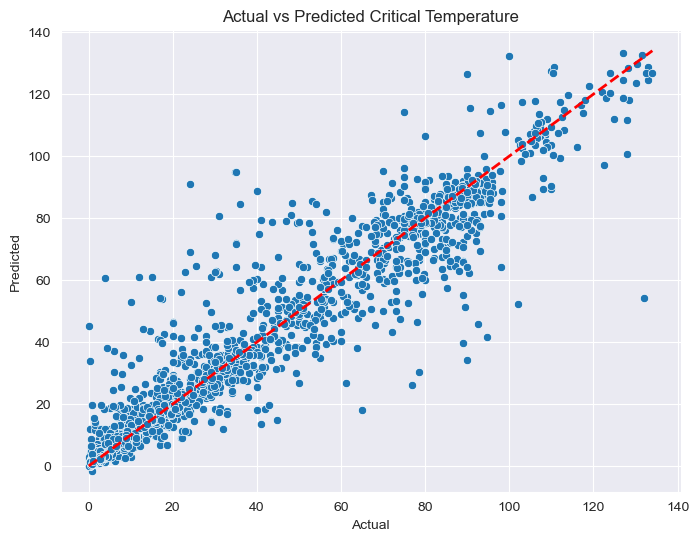

In [8]:
# Step 1: Initialize the XGBoost Regressor model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=400, learning_rate=0.1, max_depth=10,
                             reg_lambda = 0.6,
                             reg_alpha = 0.05,
                             random_state=42)

# Step 2: Fit the model on the scaled training data
xgb_model.fit(scaled_train_k_best, new_train_y)

# Step 3: Predict on the training set
xgb_train_preds = xgb_model.predict(scaled_train_k_best)

# Training results
print('XGBoost Results')
num_features = scaled_train_k_best.shape[1]
train_metrics = Evaluation_results(new_train_y, xgb_train_preds, objective = 'train', num_features  = num_features)
train_metrics

# Predict on the testing set
xgb_test_preds = xgb_model.predict(scaled_test_k_best)

# Testing results
test_metrics = Evaluation_results(y_test, xgb_test_preds, objective = 'test', num_features  = num_features)
test_metrics


# Plotting the results
plt.figure(figsize=(8, 6))
sns.scatterplot(x= y_test, y = xgb_test_preds)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Critical Temperature')
plt.show()

In [9]:
import pkg_resources

# List of packages used in your code
packages = [
    'pandas', 'numpy', 'matplotlib', 'seaborn', 'scipy', 'scikit-learn', 'statsmodels', 'xgboost'
]

# Function to print package name and version
def print_package_version(package_name):
    package_version = pkg_resources.get_distribution(package_name).version
    print(f"{package_name}: {package_version}")

# Loop through packages and print their versions
for package in packages:
    print_package_version(package)

pandas: 1.5.3
numpy: 1.24.3
matplotlib: 3.7.1
seaborn: 0.12.2
scipy: 1.10.1
scikit-learn: 1.3.0
statsmodels: 0.14.0
xgboost: 2.0.3
